### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
plt.style.use('ggplot')
import seaborn as sns
warnings.filterwarnings('ignore')

### Importing dataset

In [2]:
df=pd.read_csv('kidney_disease.csv')

### EDA

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:
### We are going to take useful features only
df=df[['age','bp','al','su','rbc','bgr','bu','ba','hemo','wc','rc','htn','cad','classification']]

In [7]:
df.head()

,age,bp,al,su,rbc,bgr,bu,ba,hemo,wc,rc,htn,cad,classification
0,48.0,80.0,1.0,0.0,NaN,121.0,36.0,notpresent,15.4,7800,5.2,yes,no,ckd
1,7.0,50.0,4.0,0.0,NaN,NaN,18.0,notpresent,11.3,6000,NaN,no,no,ckd
2,62.0,80.0,2.0,3.0,normal,423.0,53.0,notpresent,9.6,7500,NaN,no,no,ckd
3,48.0,70.0,4.0,0.0,normal,117.0,56.0,notpresent,11.2,6700,3.9,yes,no,ckd
4,51.0,80.0,2.0,0.0,normal,106.0,26.0,notpresent,11.6,7300,4.6,no,no,ckd


In [8]:
df.shape

(400, 14)

In [9]:
df.describe(include='all')

,age,bp,al,su,rbc,bgr,bu,ba,hemo,wc,rc,htn,cad,classification
count,391.000000,388.000000,354.000000,351.000000,248,356.000000,381.000000,396,348.000000,295,270,398,398,400
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,2,NaN,92,49,2,3,3
top,NaN,NaN,NaN,NaN,normal,NaN,NaN,notpresent,NaN,9800,5.2,no,no,ckd
freq,NaN,NaN,NaN,NaN,201,NaN,NaN,374,NaN,11,18,251,362,248
mean,51.483376,76.469072,1.016949,0.450142,NaN,148.036517,57.425722,NaN,12.526437,NaN,NaN,NaN,NaN,NaN
std,17.169714,13.683637,1.352679,1.099191,NaN,79.281714,50.503006,NaN,2.912587,NaN,NaN,NaN,NaN,NaN
min,2.000000,50.000000,0.000000,0.000000,NaN,22.000000,1.500000,NaN,3.100000,NaN,NaN,NaN,NaN,NaN
25%,42.000000,70.000000,0.000000,0.000000,NaN,99.000000,27.000000,NaN,10.300000,NaN,NaN,NaN,NaN,NaN
50%,55.000000,80.000000,0.000000,0.000000,NaN,121.000000,42.000000,NaN,12.650000,NaN,NaN,NaN,NaN,NaN
75%,64.500000,80.000000,2.000000,0.000000,NaN,163.000000,66.000000,NaN,15.000000,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   al              354 non-null    float64
 3   su              351 non-null    float64
 4   rbc             248 non-null    object 
 5   bgr             356 non-null    float64
 6   bu              381 non-null    float64
 7   ba              396 non-null    object 
 8   hemo            348 non-null    float64
 9   wc              295 non-null    object 
 10  rc              270 non-null    object 
 11  htn             398 non-null    object 
 12  cad             398 non-null    object 
 13  classification  400 non-null    object 
dtypes: float64(7), object(7)
memory usage: 43.9+ KB


In [11]:
### checking for null values
df.isnull().sum()

age                 9
bp                 12
al                 46
su                 49
rbc               152
bgr                44
bu                 19
ba                  4
hemo               52
wc                105
rc                130
htn                 2
cad                 2
classification      0
dtype: int64

In [12]:
### Null values imputation
df['age']=df['age'].fillna(df['age'].mean())
df['bp']=df['bp'].fillna(df['bp'].mean())
df['al']=df['al'].fillna(df['al'].mean())
df['su']=df['su'].fillna(df['su'].mean())
df['bgr']=df['bgr'].fillna(df['bgr'].mean())
df['bu']=df['bu'].fillna(df['bu'].mean())
df['hemo']=df['hemo'].fillna(df['hemo'].mean())
df['cad']=df['cad'].fillna(df['cad'].mode()[0])
df['ba']=df['ba'].fillna(df['ba'].mode()[0])
df['rbc']=df['rbc'].fillna(df['rbc'].mode()[0])
df['wc']=df['wc'].fillna(df['wc'].mode()[0])
df['rc']=df['rc'].fillna(df['rc'].mode()[0])
df['htn']=df['htn'].fillna(df['htn'].mode()[0])

In [13]:
# We can see now there is no null value in the dataset
df.isnull().sum()

age               0
bp                0
al                0
su                0
rbc               0
bgr               0
bu                0
ba                0
hemo              0
wc                0
rc                0
htn               0
cad               0
classification    0
dtype: int64

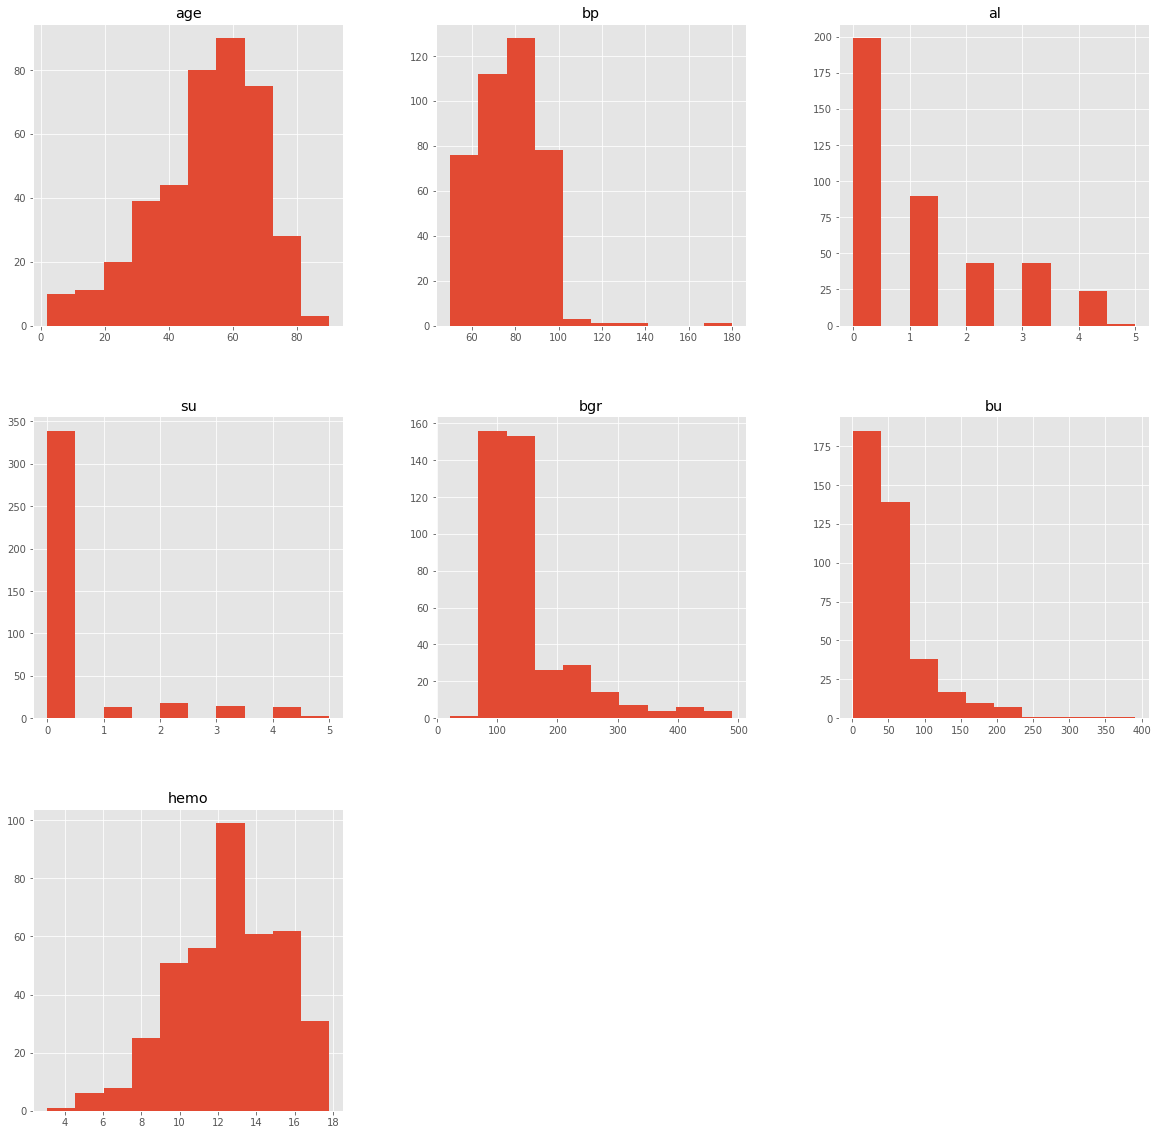

In [14]:
# Lets have look on our dataset visually
df.hist()
his=plt.gcf()
his.set_size_inches(20,20)
plt.show()

### Dealing with each feature

In [15]:
df.columns

Index(['age', 'bp', 'al', 'su', 'rbc', 'bgr', 'bu', 'ba', 'hemo', 'wc', 'rc',
       'htn', 'cad', 'classification'],
      dtype='object')

#### 1)Age

In [16]:
df['age'].value_counts()

60.0    19
65.0    17
48.0    12
50.0    12
55.0    12
        ..
90.0     1
27.0     1
83.0     1
4.0      1
79.0     1
Name: age, Length: 77, dtype: int64

In [17]:
df['age']=df['age'].astype(int)

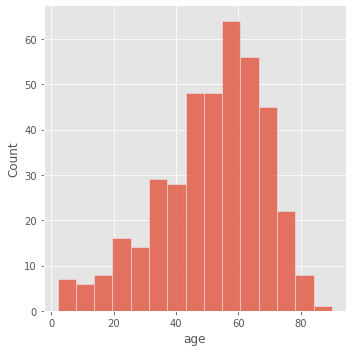

In [18]:
sns.displot(df['age'])
# We can see distribution og age here

#### 2)Blood pressure

In [19]:
df['bp'].value_counts()

80.000000     116
70.000000     112
60.000000      71
90.000000      53
100.000000     25
76.469072      12
50.000000       5
110.000000      3
140.000000      1
180.000000      1
120.000000      1
Name: bp, dtype: int64

In [20]:
df['bp']=df['bp'].astype(int)

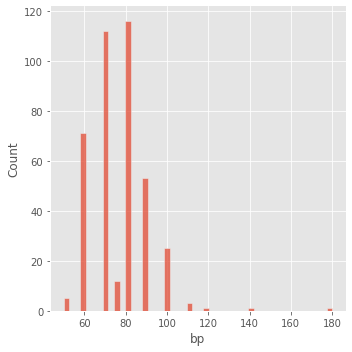

In [21]:
sns.displot(df['bp'])
# Distribution og blood pressure

#### 3)Albumin

In [22]:
df['al'].value_counts()

0.000000    199
1.016949     46
1.000000     44
2.000000     43
3.000000     43
4.000000     24
5.000000      1
Name: al, dtype: int64

In [23]:
df['al']=df['al'].astype(int)

In [24]:
df['al'].value_counts()

0    199
1     90
2     43
3     43
4     24
5      1
Name: al, dtype: int64

<AxesSubplot:xlabel='al', ylabel='count'>

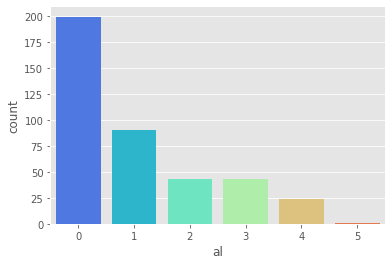

In [25]:
sns.countplot(x='al',data=df,palette='rainbow')
# Albumin level is classified on scale of 5

#### 4)Sugar

In [26]:
df['su'].value_counts()

0.000000    290
0.450142     49
2.000000     18
3.000000     14
4.000000     13
1.000000     13
5.000000      3
Name: su, dtype: int64

In [27]:
df['su']=df['su'].astype(int)

In [28]:
df['su'].value_counts()

0    339
2     18
3     14
4     13
1     13
5      3
Name: su, dtype: int64

<AxesSubplot:xlabel='su', ylabel='count'>

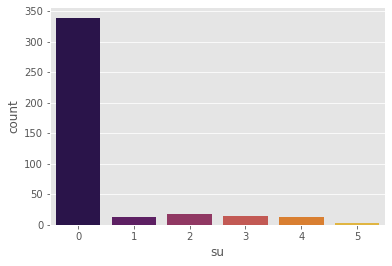

In [29]:
sns.countplot(x='su',data=df,palette='inferno')
# Sugar level is also classified on the scale of 5

#### 5)Red blood cells

In [30]:
df['rbc'].value_counts()

normal      353
abnormal     47
Name: rbc, dtype: int64

<AxesSubplot:xlabel='rbc', ylabel='count'>

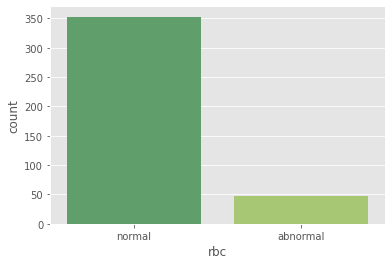

In [31]:
sns.countplot(x='rbc',data=df,palette='summer')
# most of the patients have normal count of red blood cells

#### 6)Blood glucose

In [32]:
df['bgr'].value_counts()

148.036517    44
99.000000     10
93.000000      9
100.000000     9
107.000000     8
              ..
380.000000     1
288.000000     1
84.000000      1
256.000000     1
309.000000     1
Name: bgr, Length: 147, dtype: int64

In [33]:
df['bgr']=df['bgr'].astype(int)

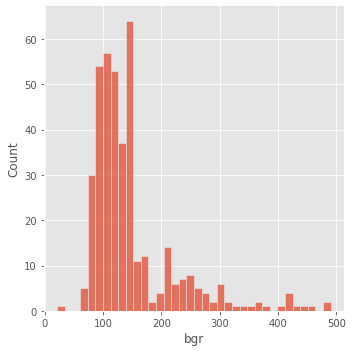

In [34]:
sns.displot(df['bgr'])
# We can see distribution of glucose here

#### 7)Blood urea

In [35]:
df['bu'].value_counts()

57.425722     19
46.000000     15
25.000000     13
19.000000     11
40.000000     10
              ..
322.000000     1
162.000000     1
235.000000     1
85.000000      1
165.000000     1
Name: bu, Length: 119, dtype: int64

In [36]:
df['bu']=df['bu'].astype(int)

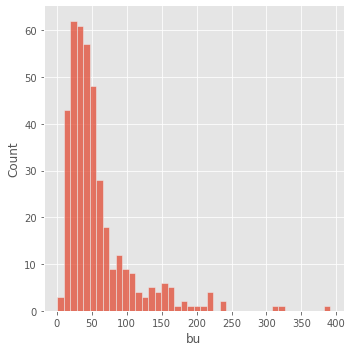

In [37]:
sns.displot(df['bu'])
# distribution of blood urea level

#### 8)Bacteria

In [38]:
df['ba'].value_counts()

notpresent    378
present        22
Name: ba, dtype: int64

<AxesSubplot:xlabel='ba', ylabel='count'>

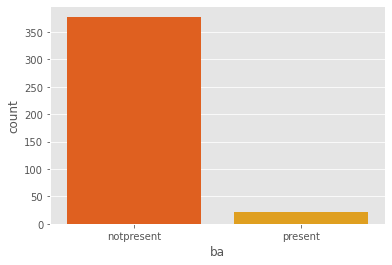

In [39]:
sns.countplot(x='ba',data=df,palette='autumn')
# We can see that most of the people do not hva e bacteria

#### 9)Hemoglobin

In [40]:
df['hemo'].value_counts()

12.526437    52
15.000000    16
10.900000     8
13.600000     7
13.000000     7
             ..
6.800000      1
8.500000      1
7.300000      1
12.800000     1
17.600000     1
Name: hemo, Length: 116, dtype: int64

In [41]:
df['hemo']=df['hemo'].astype(int)

<AxesSubplot:xlabel='hemo', ylabel='count'>

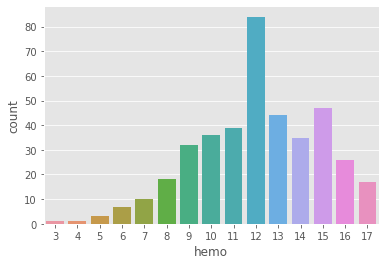

In [42]:
sns.countplot(x='hemo',data=df)
# Hemoglobin level is distributed on scale of 17

#### 10)White blood cells count

In [43]:
df['wc'].value_counts()

9800     116
6700      10
9600       9
7200       9
9200       9
        ... 
19100      1
\t?        1
12300      1
14900      1
12700      1
Name: wc, Length: 92, dtype: int64

In [44]:
df=df[df.wc!='\t?']

In [45]:
df['wc'].value_counts()

9800     116
6700      10
9200       9
9600       9
7200       9
        ... 
11200      1
19100      1
12300      1
12700      1
16700      1
Name: wc, Length: 91, dtype: int64

In [46]:
df['wc']=df['wc'].astype(int)

In [47]:
df['wc'].dtype

dtype('int32')

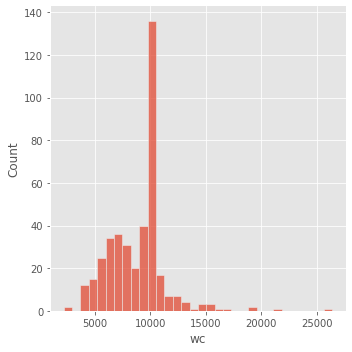

In [48]:
sns.displot(df['wc'])
# Distribution of white blood cells

#### 11)Red blood cells count

In [49]:
df['rc'].value_counts()

5.2    147
4.5     16
4.9     14
4.7     11
4.8     10
3.9     10
4.6      9
3.4      9
5.9      8
5.5      8
6.1      8
5.0      8
3.7      8
5.3      7
5.8      7
5.4      7
3.8      7
5.6      6
4.3      6
4.2      6
3.2      5
4.4      5
5.7      5
6.4      5
5.1      5
6.2      5
6.5      5
4.1      5
3.6      4
6.3      4
6.0      4
4.0      3
3.3      3
4        3
3.5      3
2.9      2
3.1      2
2.6      2
2.1      2
2.5      2
2.8      2
3.0      2
2.7      2
5        2
2.3      1
\t?      1
2.4      1
3        1
8.0      1
Name: rc, dtype: int64

In [50]:
df=df[df.rc!='\t?']

In [51]:
df.rc.value_counts()

5.2    147
4.5     16
4.9     14
4.7     11
4.8     10
3.9     10
4.6      9
3.4      9
5.9      8
5.5      8
6.1      8
5.0      8
3.7      8
5.3      7
5.8      7
5.4      7
3.8      7
5.6      6
4.3      6
4.2      6
3.2      5
4.4      5
5.7      5
6.4      5
5.1      5
6.2      5
6.5      5
4.1      5
3.6      4
6.0      4
6.3      4
4.0      3
3.5      3
3.3      3
4        3
5        2
3.1      2
2.6      2
2.1      2
2.9      2
2.5      2
3.0      2
2.7      2
2.8      2
2.3      1
2.4      1
3        1
8.0      1
Name: rc, dtype: int64

In [52]:
df['rc']=df['rc'].astype('float')

In [53]:
df['rc'].dtype

dtype('float64')

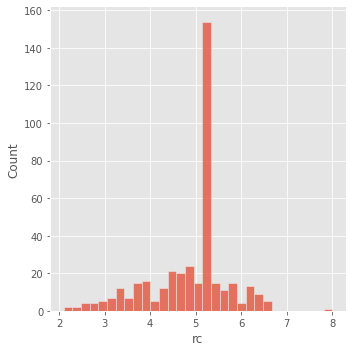

In [54]:
sns.displot(df['rc'])
# distribution of red blood cells

#### 12) Hypertension

In [55]:
df['htn'].value_counts()

no     251
yes    147
Name: htn, dtype: int64

<AxesSubplot:xlabel='htn', ylabel='count'>

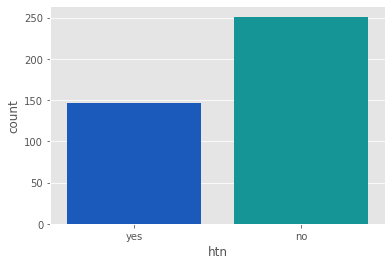

In [56]:
sns.countplot(x='htn',data=df,palette='winter')
### Number of people having hypertension is half as compared to people not having hyper tension

#### 13)Coronary artery disease

In [57]:
df['cad'].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [58]:
df=df[df.cad!='\tno']

In [59]:
df['cad'].value_counts()

no     362
yes     34
Name: cad, dtype: int64

<AxesSubplot:xlabel='cad', ylabel='count'>

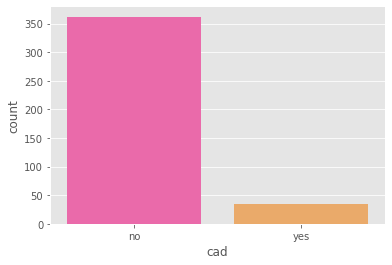

In [60]:
sns.countplot(x='cad',data=df,palette='spring')
# There is huge difference between people having coronary artery disease and not having it

#### 14) Classification

In [61]:
df['classification'].value_counts()

ckd       244
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [62]:
df=df[df.classification!='ckd\t']

In [63]:
df['classification'].value_counts()

ckd       244
notckd    150
Name: classification, dtype: int64

<AxesSubplot:xlabel='classification', ylabel='count'>

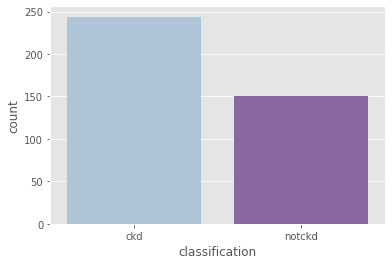

In [64]:
sns.countplot(x='classification',data=df,palette='BuPu')
# We can say that we have well balanced dataset here

In [65]:
df.dtypes

age                 int32
bp                  int32
al                  int32
su                  int32
rbc                object
bgr                 int32
bu                  int32
ba                 object
hemo                int32
wc                  int32
rc                float64
htn                object
cad                object
classification     object
dtype: object

In [66]:
#### We are going to perform label encoding for categorical variables here
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['rbc']=le.fit_transform(df['rbc'])
df['ba']=le.fit_transform(df['ba'])
df['htn']=le.fit_transform(df['htn'])
df['cad']=le.fit_transform(df['cad'])
df['classification']=le.fit_transform(df['classification'])


In [67]:
df.dtypes

age                 int32
bp                  int32
al                  int32
su                  int32
rbc                 int32
bgr                 int32
bu                  int32
ba                  int32
hemo                int32
wc                  int32
rc                float64
htn                 int32
cad                 int32
classification      int32
dtype: object

<AxesSubplot:>

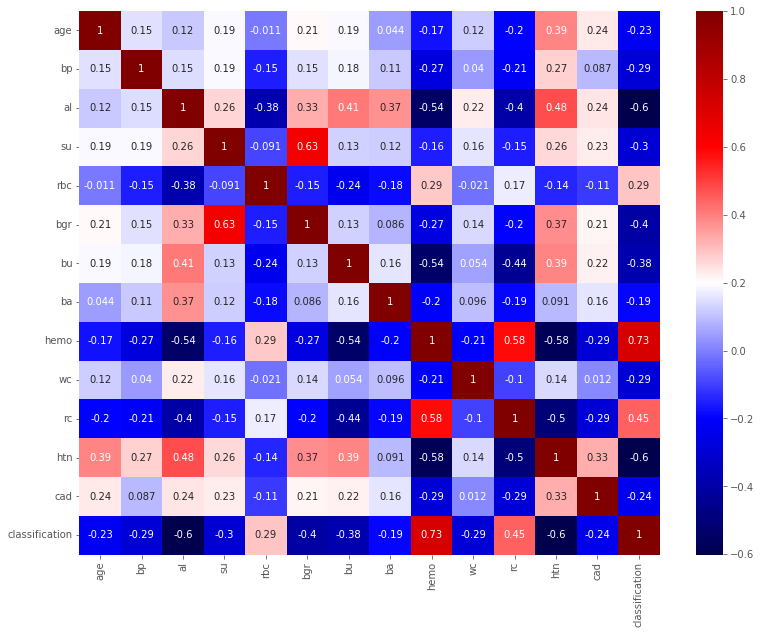

In [68]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True,cmap='seismic')

#### Analysis and preprocessing ends here

In [69]:
df.shape

(394, 14)

### Separating dependent and independent variables

In [70]:
X=df.drop('classification',axis=1)
y=df.classification

In [71]:
X.shape

(394, 13)

In [72]:
y.shape

(394,)

### Performing train-test-split

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Trying out several algorithms

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score
alg=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier()]
names=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','XGBClassifer']

In [75]:
l1=[]
l2=[]
for i in alg:
    model=i
    model.fit(X_train,y_train)
    y_hat=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_hat)
    f1=f1_score(y_test,y_hat)
    l1.append(accuracy)
    l2.append(f1)

[10:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [76]:
eval=pd.DataFrame({'Model':names,
                  'Accuracy':l1,'F1-score':l2})

In [77]:
eval

,Model,Accuracy,F1-score
0,LogisticRegression,0.949367,0.920000
1,DecisionTreeClassifier,0.987342,0.979592
2,RandomForestClassifier,0.987342,0.978723
3,XGBClassifer,0.987342,0.978723


### Thus it is clear due to highest accuracy we are going to use random forest classifier

In [78]:
rc=RandomForestClassifier()
rc.fit(X_train,y_train)
y_hat2=rc.predict(X_test)

In [79]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_hat2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       1.00      0.96      0.98        24

    accuracy                           0.99        79
   macro avg       0.99      0.98      0.98        79
weighted avg       0.99      0.99      0.99        79



<AxesSubplot:>

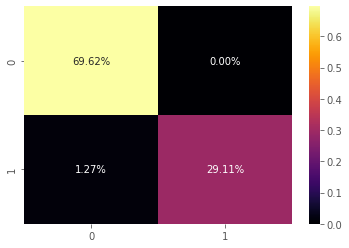

In [80]:
a=confusion_matrix(y_test,y_hat2)
sns.heatmap(a/np.sum(a),annot=True,fmt='.2%',cmap='inferno')
# Thus it is clear that our algorithm succesfully classified 100% of test values right

<AxesSubplot:>

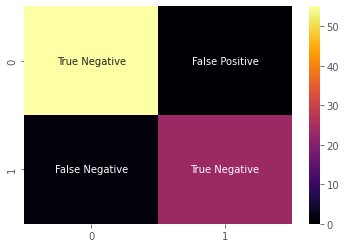

In [81]:
labels = ['True Negative','False Positive','False Negative','True Negative']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(a, annot=labels, fmt='', cmap='inferno')